# Your first code with Qiskit: Gates and measurements

In [45]:
from qiskit import IBMQ
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-08 09:38:57,953: Credentials are already in use. The existing account in the session will be replaced.


In [46]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()    # List all available providers

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

### Your first quantum circuit

Let's begin exploring the different tools in Qiskit Terra. For that, we will now create a Quantum Circuit.



In [47]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

Do you recognize this circuit? It creates 1 of the 4 Bell states, which are maximally entangled and build an orthonormal basis.

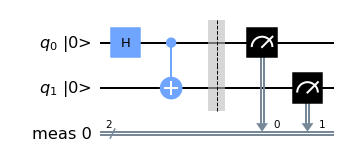

In [48]:
circuit.draw(initial_state=True)

Now let's run the circuit in the Aer simulator and plot the results in a histogram.


In [50]:
from qiskit import Aer

sim = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
result = sim.run(circuit).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
counts

{'11': 491, '00': 533}

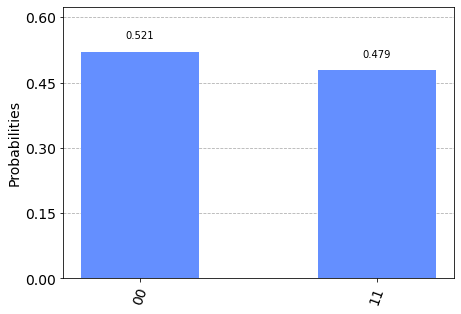

In [51]:
from qiskit.visualization import plot_histogram

# and display it on a histogram
plot_histogram(counts)

In [52]:
backend = Aer.get_backend('unitary_simulator')

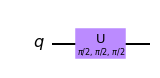

In [53]:
from numpy import pi 
circuit = QuantumCircuit(1)
circuit.u(pi/2,pi/2,pi/2,0)
circuit.draw()

In [54]:
from qiskit.visualization import array_to_latex
from qiskit import transpile
job = backend.run(transpile(circuit, backend))
array_to_latex(job.result().get_unitary(circuit, decimals=3))

<IPython.core.display.Latex object>

You may try other gates: x, y, z, id, h, s, sdg, t, tdg, rx(pi/2, 0), ry(pi/2, 0), rz(pi/2, 0)

#### Multi-Qubit Gates

How does Qiskit order basis vectors?

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state |0⟩ and second is in state |1⟩, their joint state would be|01⟩. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as ∣10⟩. 

Importantly, this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit, as discussed here https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Two-qubit-gates

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as |00⟩, |01⟩, |10⟩, and |11⟩. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.

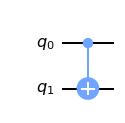

In [55]:
circuit = QuantumCircuit(2)
circuit.cx(0,1)
circuit.draw()

In [56]:
job = backend.run(transpile(circuit, backend))
array_to_latex(job.result().get_unitary(circuit, decimals=3))

<IPython.core.display.Latex object>

You may try other gates such as: cy, cz, ch, crz, swap

And check all gates here: https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit

There are different drawing formats. The parameter output (str) selects the output method to use for drawing the circuit. Valid choices are ``text, mpl, latex, latex_source``. See [qiskit.circuit.QuantumCircuit.draw](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html?highlight=draw)

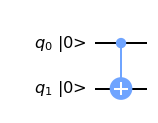

In [13]:
circuit.draw(initial_state=True, output='mpl')

### Quantum Circuit Properties

When constructing quantum circuits, there are several properties that help quantify the “size” of the circuits, and their ability to be run on a noisy quantum device. Some of these, like number of qubits, are straightforward to understand, while others like depth and number of tensor components require a bit more explanation. Here we will explain all of these properties, and, in preparation for understanding how circuits change when run on actual devices, highlight the conditions under which they change.

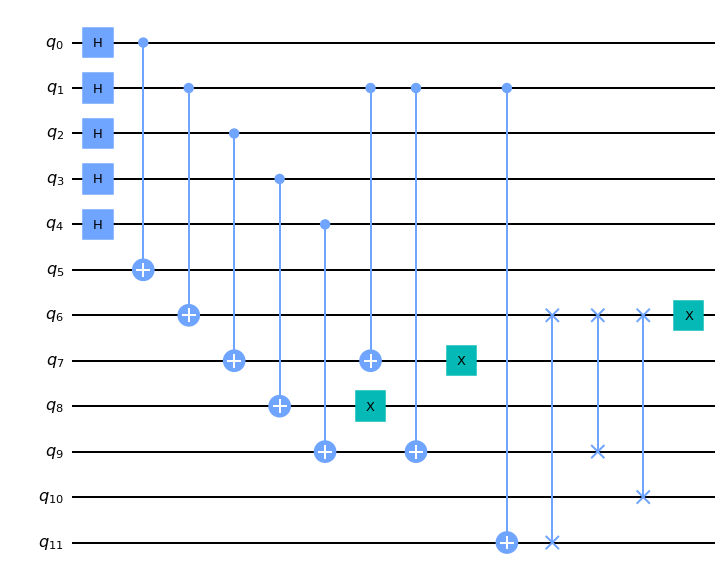

In [57]:
qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)

qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw()

From the plot, it is easy to see that this circuit has 12 qubits, and a collection of Hadamard, CNOT, X, and SWAP gates. But how to quantify this programmatically? Because we can do single-qubit gates on all the qubits simultaneously, the number of qubits in this circuit is equal to the width of the circuit:

In [58]:
qc.width()

12

We can also just get the number of qubits directly:

In [59]:
qc.num_qubits

12

**IMPORTANT**

For a quantum circuit composed from just qubits, the circuit width is equal to the number of qubits. This is the definition used in quantum computing. However, for more complicated circuits with classical registers, and classically controlled gates, this equivalence breaks down. As such, from now on we will not refer to the number of qubits in a quantum circuit as the width


It is also straightforward to get the number and type of the gates in a circuit using `QuantumCircuit.count_ops()`:

In [60]:
qc.count_ops()

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

We can also get just the raw count of operations by computing the circuits `QuantumCircuit.size()`:

In [61]:
qc.size()

19

A particularly important circuit property is known as the circuit depth. The depth of a quantum circuit is a measure of how many “layers” of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit. Because quantum gates take time to implement, the depth of a circuit roughly corresponds to the amount of time it takes the quantum computer to execute the circuit. Thus, the depth of a circuit is one important quantity used to measure if a quantum circuit can be run on a device.

In [62]:
qc.depth()

9

### Final Statevector and Unitary

To save the final statevector of the simulation we can append the circuit with the ``save_statevector`` instruction. Note that this instruction should be applied before any measurements if we do not want to save the collapsed post-measurement state

In [63]:
# Saving the final statevector
# Construct quantum circuit without measure

from qiskit.visualization import array_to_latex

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.save_statevector()

backend = Aer.get_backend('aer_simulator')
result = backend.run(circuit).result()
array_to_latex(result.get_statevector())

<IPython.core.display.Latex object>

To save the unitary matrix for a ``QuantumCircuit`` we can append the circuit with the ``save_unitary`` instruction. Note that this circuit cannot contain any measurements or resets since these instructions are not supported on for the ``"unitary"`` simulation method

In [64]:
# Saving the circuit unitary
# Construct quantum circuit without measure

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.save_unitary()

result = backend.run(circuit).result()
array_to_latex(result.get_unitary())

<IPython.core.display.Latex object>

We can also apply save instructions at multiple locations in a circuit. Note that when doing this we must provide a unique label for each instruction to retrieve them from the results.

In [65]:
# Saving multiple states
# Construct quantum circuit without measure
import numpy as np

steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

##### Setting a custom statevector

The ``set_statevector`` instruction can be used to set a custom Statevector state. The input statevector must be valid.

In [66]:
import qiskit.quantum_info as qi
# Generate a random statevector
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([ 0.18572453-0.03102771j, -0.26191269-0.18155865j,
               0.12367038-0.47837907j,  0.66510011-0.4200986j ],
             dims=(2, 2))}

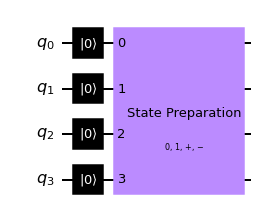

In [67]:
# Initialization (Using the initialize instruction)

qc = QuantumCircuit(4)

qc.initialize('01+-')
qc.draw()
qc.decompose().draw()

<IPython.core.display.Latex object>

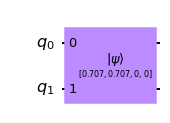

In [68]:
# Initialization

import math

desired_vector = [1 / math.sqrt(2), 1 / math.sqrt(2), 0, 0]
display(array_to_latex(desired_vector))


qc = QuantumCircuit(2)
qc.initialize(desired_vector, [0, 1])
qc.draw()

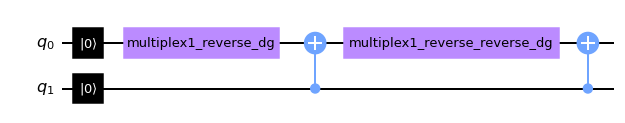

In [28]:
qc.decompose().decompose().decompose().decompose().draw()

There is another option to initalize the circuit to a desired quantum state. 
We use ` qiskit.circuit.QuantumCircuit.isometry` In general, it is used for attaching an arbitrary isometry from m to n qubits to a circuit. In particular, this allows to attach arbitrary unitaries on n qubits (m=n) or to prepare any state on n qubits (m=0). The decomposition used here was introduced by Iten et al. in https://arxiv.org/abs/1501.06911. This is important because in many experimental architectures, the C-NOT gate is relatively 'expensive' and hence we aim to keep the number of these as low as possible. 

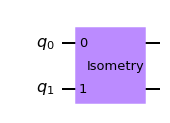

In [69]:
# Isometry
qc = QuantumCircuit(2)
qc.isometry(desired_vector, q_input=[],q_ancillas_for_output=[0,1])
qc.draw()

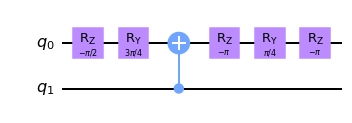

In [70]:
qc.decompose().decompose().decompose().decompose().draw()

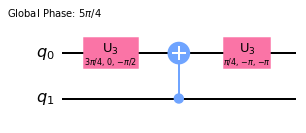

In [31]:
simulator = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, simulator, optimization_level=3)
qc_transpiled.draw()

Let's compare both circuit outputs. Which one has more gates?

### Other components

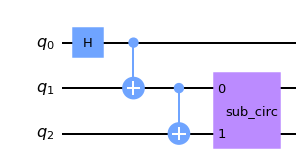

In [71]:
#Composite gates
from qiskit import QuantumRegister
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw()

Circuits are not immediately decomposed upon conversion to_instruction to allow circuit design at higher levels of abstraction. When desired, or before compilation, sub-circuits will be decomposed via the decompose method.

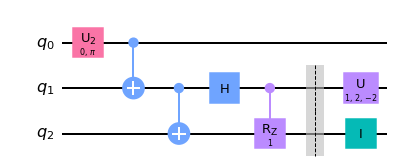

In [33]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw()

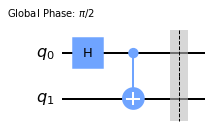

<IPython.core.display.Latex object>

In [72]:
# Circuit with Global Phase

circuit = QuantumCircuit(2)
circuit.h(0)
#circuit.save_unitary()
circuit.cx(0, 1)
circuit.global_phase = np.pi / 2
circuit.save_unitary()

display(circuit.draw())
#backend = Aer.get_backend('unitary_simulator')
backend = Aer.get_backend('aer_simulator_unitary')
result = backend.run(circuit).result()
array_to_latex(result.get_unitary())

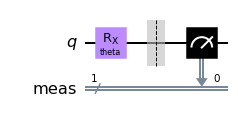

In [73]:
# Parameterized Quantum Circuits 

from qiskit.circuit import Parameter
theta = Parameter('theta')

circuit = QuantumCircuit(1)
circuit.rx(theta, 0)
circuit.measure_all()
circuit.draw()

In [74]:
res = sim.run(circuit, parameter_binds=[{theta: [np.pi/2, np.pi, 0]}]).result()  # Different bindings
res.get_counts()

[{'1': 504, '0': 520}, {'1': 1024}, {'0': 1024}]

In [75]:
#We can inspect the circuit’s parameters
print(qc.parameters)

ParameterView([])


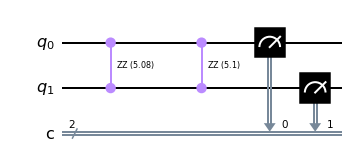

In [76]:
# Random Circuit

from qiskit.circuit.random import random_circuit

circ = random_circuit(2, 2, measure=True)
circ.draw(output='mpl')

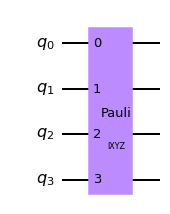

In [77]:
# Pauli
from qiskit.quantum_info.operators import Pauli

circuit = QuantumCircuit(4)
IXYZ = Pauli('IXYZ')
circuit.append(IXYZ, [0, 1, 2, 3])
circuit.draw()
# circuit.decompose().draw()

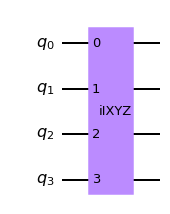

In [40]:
# Pauli with phase 
from qiskit.quantum_info.operators import Pauli

circuit = QuantumCircuit(4)
iIXYZ = Pauli('iIXYZ')  # ['', '-i', '-', 'i']
circuit.append(iIXYZ, [0, 1, 2, 3])
circuit.draw()

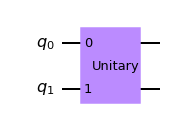

In [78]:
# Any unitary!
matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
          
circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])
circuit.draw()
# circuit.decompose().draw() #synthesis

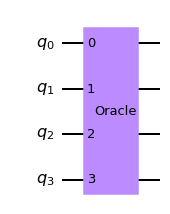

In [79]:
# Classical logic
from qiskit.circuit import classical_function, Int1

@classical_function
def oracle(x: Int1, y: Int1, z: Int1) -> Int1:
    return not x and (y or z)

circuit = QuantumCircuit(4)
circuit.append(oracle, [0, 1, 2, 3])
circuit.draw()
# circuit.decompose().draw() #synthesis

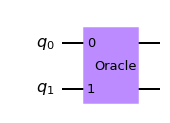

In [80]:
# Classical logic
from qiskit.circuit import classical_function, Int1
@classical_function
def oracle(x: Int1) -> Int1:
    return not x
circuit = QuantumCircuit(2)
circuit.append(oracle, [0, 1])
circuit.draw()
# circuit.decompose().draw() #synthesis

##### How to create an operator?

https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html

In [44]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright